# Questions:

* Level height is missing
* topography is missing


# Can HRRR be applied to rap_chem?

# explore data set

the data is actually in netcdf!!! juppii

In [49]:
fname = '/mnt/telg/tmp/rap_chem_raw/wrfout_d01_2021-07-27_06_00_00_gml'
ds = xr.open_dataset(fname)

In [50]:
fname = '/mnt/telg/tmp/rap_tmp/rap-chem.latlon.nc'
lli = xr.open_dataset(fname)

In [52]:
lli

<xarray.Dataset>
Dimensions:  (Time: 1, south_north: 834, west_east: 953)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east
Data variables:
    *empty*
Attributes: (12/123)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2021-07-30_06:00:00
    SIMULATION_START_DATE:           2021-07-30_06:00:00
    WEST-EAST_GRID_DIMENSION:        954
    SOUTH-NORTH_GRID_DIMENSION:      835
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    ETAC:                            0.2
    description:                     column wet scavening flux
    units:                           mmol or ug m^-2
    stagger:                         Z
    history:                         Fri Jul 30 18:56:18 2021: ncks -v XLAT,X...
    NCO:                             4.1.0

In [77]:
ds

<xarray.Dataset>
Dimensions:    (Time: 1, bottom_top: 50, south_north: 834, west_east: 953)
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Data variables: (12/38)
    asoa       (Time, bottom_top, south_north, west_east) float32 ...
    bsoa       (Time, bottom_top, south_north, west_east) float32 ...
    cla        (Time, bottom_top, south_north, west_east) float32 ...
    ec         (Time, bottom_top, south_north, west_east) float32 ...
    naa        (Time, bottom_top, south_north, west_east) float32 ...
    nh4a       (Time, bottom_top, south_north, west_east) float32 ...
    ...         ...
    SWUPBC     (Time, south_north, west_east) float32 ...
    SWUPBCLN   (Time, south_north, west_east) float32 ...
    SWUPT      (Time, south_north, west_east) float32 ...
    SWUPTCLN   (Time, south_north, west_east) float32 ...
    T          (Time, bottom_top, south_north, west_east) float32 ...
    T00        (Time) float32 290.0
Attributes: (12/124)
    TITLE:                            OUTPUT FROM *             PROGRAM:WRF-C...
    START_DATE:                      2021-07-27_06:00:00
    SIMULATION_START_DATE:           2021-07-27_06:00:00
    WEST-EAST_GRID_DIMENSION:        954
    SOUTH-NORTH_GRID_DIMENSION:      835
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    description:                     column wet scavening flux
    units:                           mmol or ug m^-2
    stagger:                         Z
    history:                         Tue Jul 27 09:48:54 2021: ncks -A -v SWD...
    NCO:                             4.1.0
    nco_openmp_thread_number:        1

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [75]:
plt.rcParams['figure.dpi'] = 400

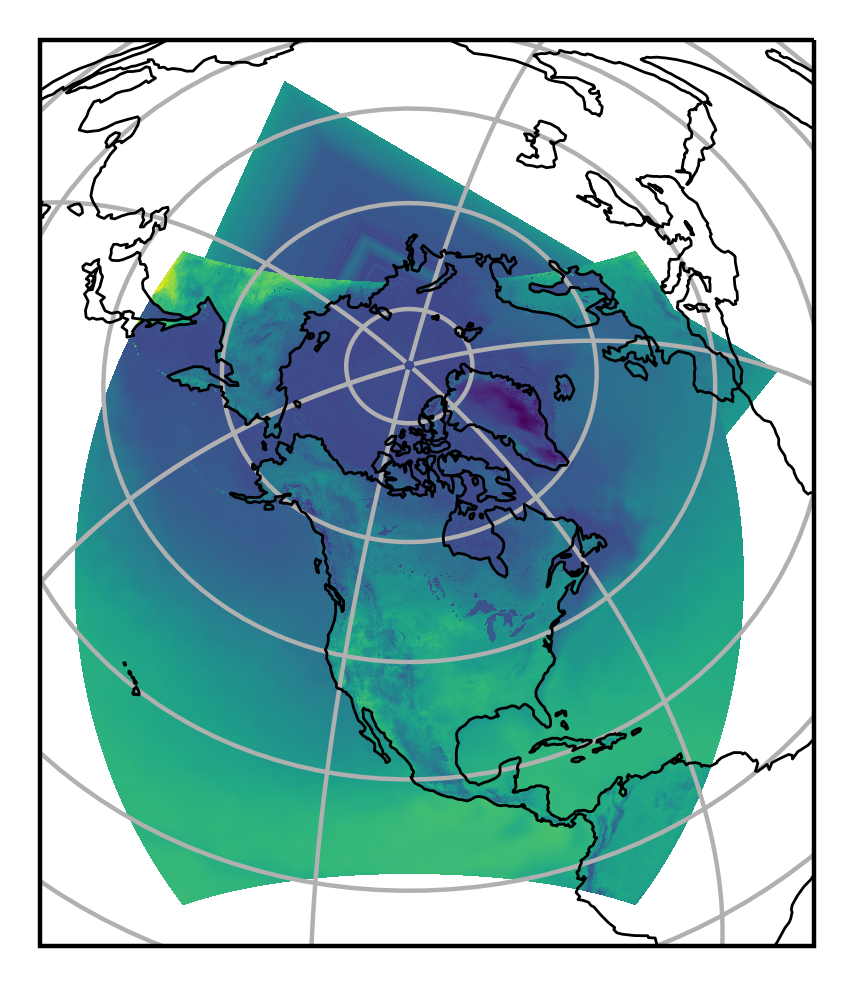

In [76]:
# if attrs['GRIB_gridType'] == 'lambert':
lc_kwargs = dict(
    globe=ccrs.Globe(ellipse='sphere'),
    central_latitude=ds.attrs['CEN_LAT'],
    central_longitude=ds.attrs['CEN_LON'],
#     cutoff = 0,
#     standard_parallels=(attrs['GRIB_Latin1InDegrees'],\
#                         attrs['GRIB_Latin2InDegrees'])
)
# lc = ccrs.LambertConformal(**lc_kwargs, )
lc = ccrs.LambertAzimuthalEqualArea(**lc_kwargs, )
# lc = ccrs.AzimuthalEquidistant(**lc_kwargs, )
# lc = ccrs.EquidistantConic(**lc_kwargs, )
# lc = ccrs.AlbersEqualArea(**lc_kwargs, )
# lc = ccrs.Orthographic(**lc_kwargs, )
# lc = ccrs.Stereographic(**lc_kwargs, )
# lc = ccrs.TransverseMercator(**lc_kwargs, )
# lc = ccrs.Gnomonic(**lc_kwargs, )


# lc = ccrs.LambertCylindrical(**lc_kwargs)
#     return lc

plt.figure(figsize=(9.4248, 3))
# ax = plt.axes(projection=ccrs.LambertCylindrical())
ax = plt.axes(projection=lc)

# ds.LWUPBC.isel(Time = 0).plot.pcolormesh(ax = ax, zorder = 0)
# ax.pcolormesh(lli.XLONG.isel(Time = 0), lli.XLAT.isel(Time = 0), ds.LWUPBC.isel(Time = 0),
# #               transform = lc
#              )
ax.pcolormesh(lli.XLONG.isel(Time = 0).transpose(), lli.XLAT.isel(Time = 0).transpose(), ds.LWUPBC.isel(Time = 0).transpose(),
              transform = ccrs.PlateCarree(),
             )
ax.coastlines(resolution='110m', zorder = 100, lw = 0.5)
ax.gridlines()
lim = 12755636.1863
# lim = 12700000
# ax.set_xlim(-200, -100)

# Try to follow what hrrr_scraper does

In [78]:
from hrrr_scraper import hrrr_lab as hl
from atmPy.

In [ ]:
hl.ProjectorProject(sites,
    path2raw='/mnt/telg/tmp/hrrr_tmp/',
    path2projected_individual='/mnt/telg/tmp/hrrr_tmp_inter/',
    path2projected_final='/mnt/telg/projects/smoke_at_gml_sites/data/wrfnat/',
    ftp_server='ftp.ncep.noaa.gov',
    ftp_path2files='/pub/data/nccf/com/hrrr/prod',
    max_forcast_interval=18,)